In [101]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PHYS 541 Assignment 2 Question 2

Consider the dataset called auto-mpg.csv. Analyze this data set using a multi-factor approach, including interaction terms. Carry out this analysis as follows:

1) Plot MPG (miles per gallon) vs. each of the other factors in the data set. I'm going to ignore the car name for now, and plot mpg vs. mpg so I can have an even number of plots
2) Clean up the data. I've snuck this step into my loop for the plots in step 1. 

In [102]:
# Read the data
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


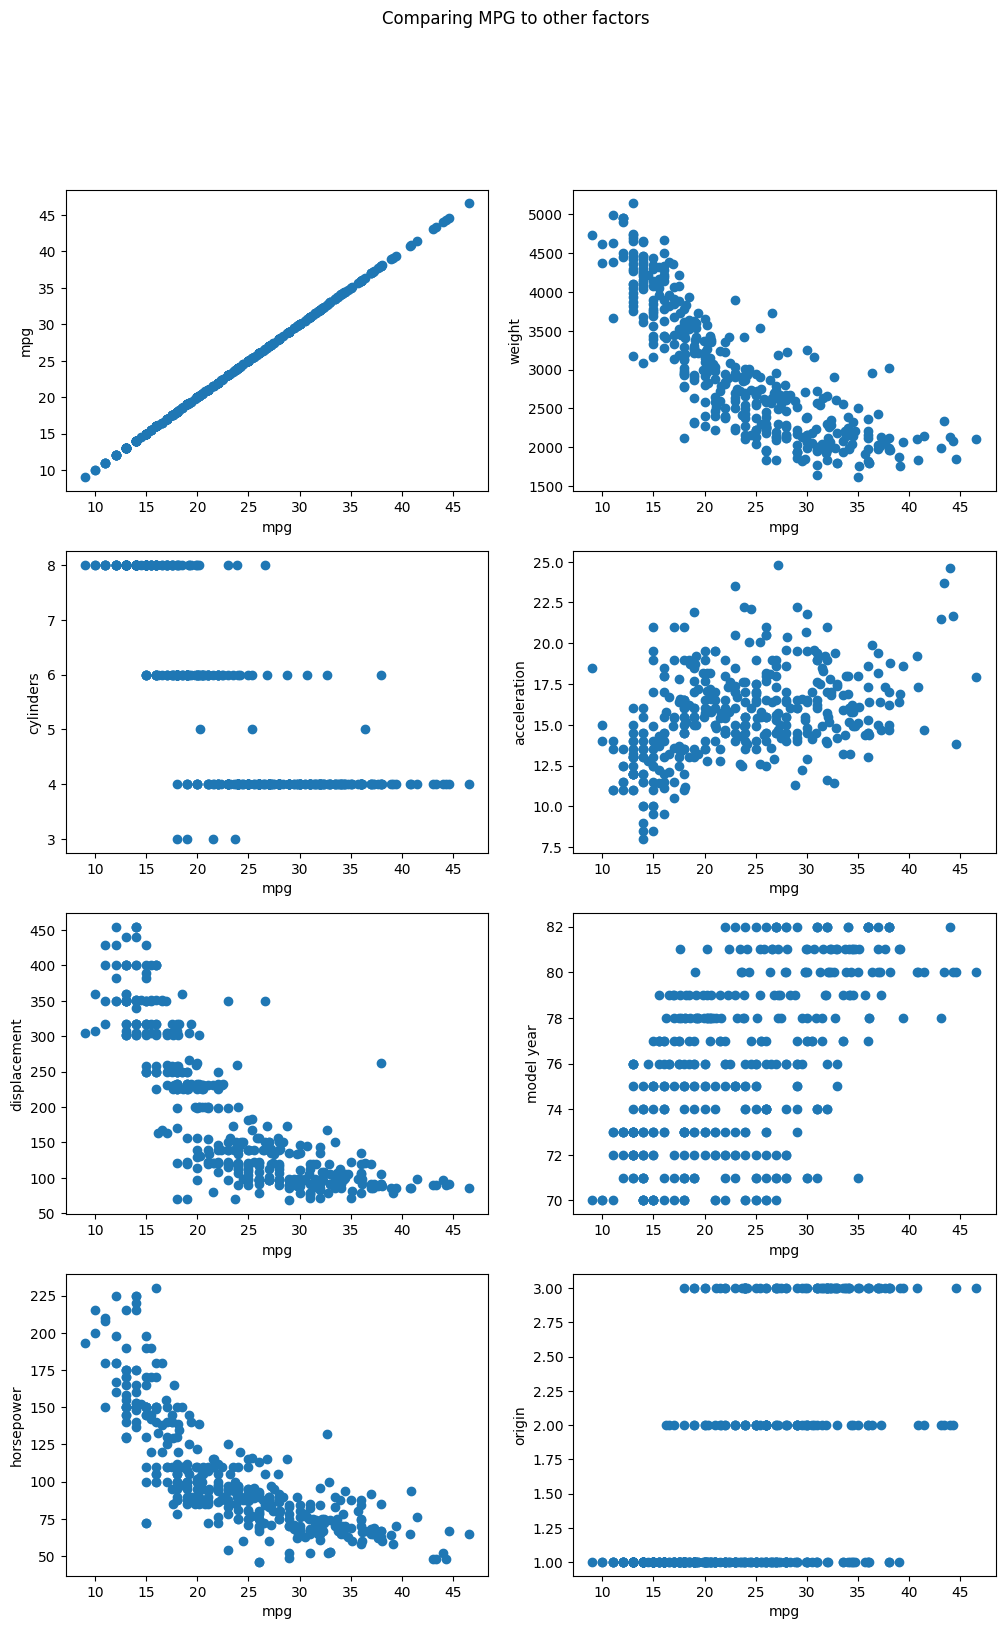

In [103]:
# Make an x by y grid of plots
# Note the variables are n-1 the plots you actually get (so this gives 4x2)
x_plots = 3
y_plots = 1
fig, ax = plt.subplots(x_plots+1, y_plots+1, figsize=(12, 18))
plt.suptitle("Comparing MPG to other factors")

# Fill them in (using loops, so I don't have to copy-paste as much)
i = 0
j = 0
for dataset in df.columns:
    # Ignoring car name
    if dataset == 'car name':
        continue
    # Make sure everything is numeric
    df[dataset] = pd.to_numeric(df[dataset], errors='coerce')
    # clean up the horsepower data
    if dataset == 'horsepower':
        horse_med = df[dataset].median()
        df[dataset] = df[dataset].fillna(horse_med)
    ax[i][j].plot(df['mpg'], df[dataset], 'o', label='data')
    ax[i][j].set_xlabel('mpg')
    ax[i][j].set_ylabel(dataset)
    if i < x_plots:
        i += 1
    else:
        j += 1
        i = 0

3) Create NORMALIZED column data for each of the factors, as we did in the
example presented in class.

In [104]:
# Clean up column names
for dataset in df.columns:
    if ' ' in dataset:
        new = str(dataset)
        new = new.replace(' ', '_')
        df.rename(columns={dataset : new}, inplace=True)

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


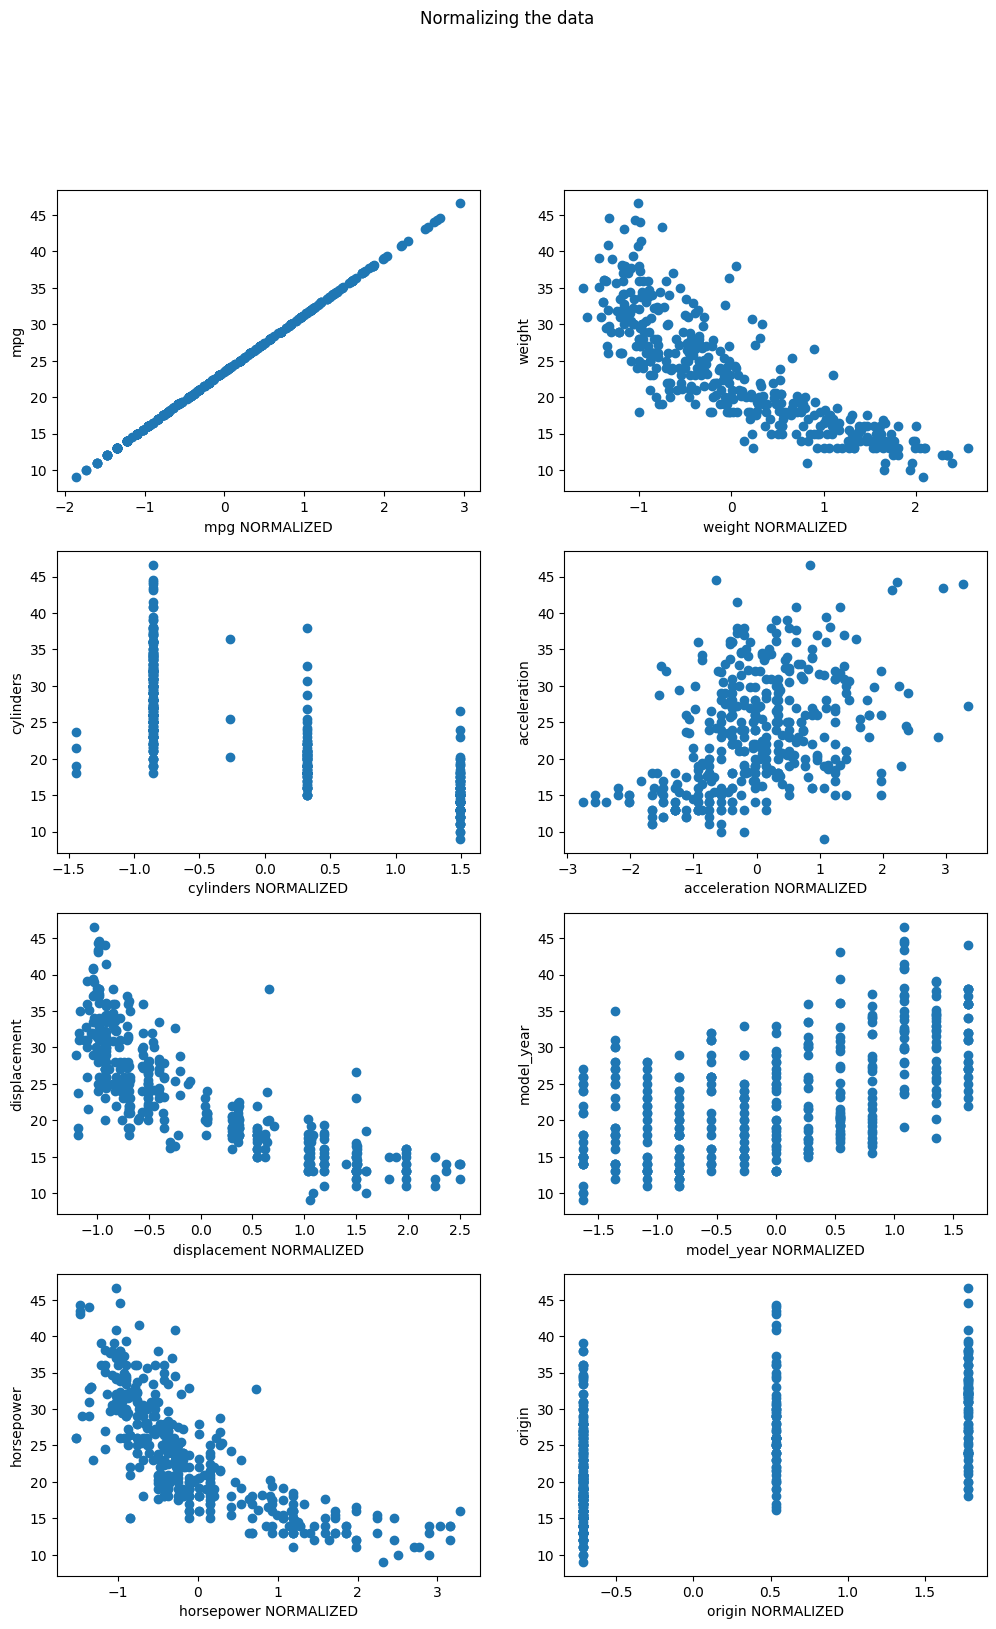

In [105]:
# Use this loop again
fig, ax = plt.subplots(x_plots+1, y_plots+1, figsize=(12, 18))
plt.suptitle("Normalizing the data")

# Fill them in (using loops, so I don't have to copy-paste as much)
i = 0
j = 0
for dataset in df.columns:
    # Ignoring car name
    if dataset == 'car_name':
        continue
    # Normalize now
    df[f"{dataset}_normalized"] = (df[dataset] - df[dataset].mean()) / df[dataset].std()
    ax[i][j].plot(df[f"{dataset}_normalized"], df['mpg'], 'o')
    ax[i][j].set_xlabel(f"{dataset} NORMALIZED")
    ax[i][j].set_ylabel(dataset)
    if i < x_plots:
        i += 1
    else:
        j += 1
        i = 0

This looks good (I think)

4) Create and fit a linear regression model that just includes the terms linear in the
factors (i.e. do not include any interation terms or higher order terms). Once fit, create a
column in the data frame for the predictions and residuals of this model. As a measure
of how well this model does, you might create a histogram of the residuals, and extract
the standard deviation of the residuals.

In [106]:
# Generate the string for the model
model_string = "mpg ~ "
for dataset in df.columns:
    if 'mpg' in dataset:
        continue
    if 'normalized' in dataset:
        model_string += f"{dataset} + "

model_string = model_string.rstrip(' + ')
print(model_string)

model = smf.ols(model_string, data=df)
model = model.fit()

print(model.summary())

mpg_pred = model.predict()
df["mpg_predictions"] = mpg_pred
df["mpg_residuals"] = df['mpg'] - mpg_pred

mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + weight_normalized + acceleration_normalized + model_year_normalized + origin_normalized
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        13:38:52   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std e

std. dev of residuals =  3.307309209454172


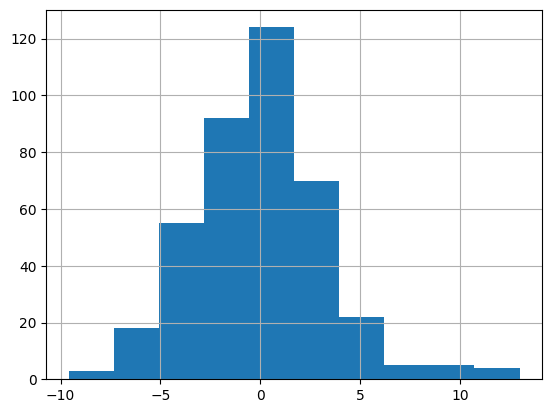

In [107]:
# Histogram of residuals
df["mpg_residuals"].hist()
# "Standard deviations" of residuals (although its really 2 standard deviations)
print("std. dev of residuals = ", df["mpg_residuals"].std())

5) Remove any terms in the model that are not statistically significant (P &lt; 0.05)
and refit with this new model.

In [108]:
# Removing any insignificant (p < 0.05) terms and refitting
model_string2 = "mpg ~ displacement_normalized + weight_normalized + model_year_normalized + origin_normalized"
model2 = smf.ols(model_string2, data=df)
model2 = model2.fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        13:38:52   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Displacement seems to become less significant when the other factors are removed. This makes sense, as miles-per-gallon shouldn't depend on the distance traveled. 

6) Now, add in the interaction terms. You should add back into the model all of the
first order linear terms (even if they are not statistically significant in Step 5). Note that
if there are seven possible factors that might affect MPG, then there will be ( 6 + 5 + 4 +
3 + 2 + 1 = ) 21 additional interaction terms. So, you should then have a model with 28
total terms!

In [109]:
# I'll start with the string I was using with all the linear terms
model_string3 = model_string + ' + '
# Now add all the interaction terms
# I don't care if they repeat
for d1 in df.columns:
    for d2 in df.columns:
        if ('mpg' in d1) or ('mpg' in d2):
            continue
        if not (('normalized' in d1) and ('normalized' in d2)):
            continue
        if d1 == d2:
            continue
        model_string3 += f"{d1}*{d2} + "

model_string3 = model_string3.rstrip(' + ')
print(model_string3)

mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + weight_normalized + acceleration_normalized + model_year_normalized + origin_normalized + cylinders_normalized*displacement_normalized + cylinders_normalized*horsepower_normalized + cylinders_normalized*weight_normalized + cylinders_normalized*acceleration_normalized + cylinders_normalized*model_year_normalized + cylinders_normalized*origin_normalized + displacement_normalized*cylinders_normalized + displacement_normalized*horsepower_normalized + displacement_normalized*weight_normalized + displacement_normalized*acceleration_normalized + displacement_normalized*model_year_normalized + displacement_normalized*origin_normalized + horsepower_normalized*cylinders_normalized + horsepower_normalized*displacement_normalized + horsepower_normalized*weight_normalized + horsepower_normalized*acceleration_normalized + horsepower_normalized*model_year_normalized + horsepower_normalized*origin_normalized + weight_normal

In [110]:
model4 = smf.ols(model_string3, data=df)
model4 = model4.fit()
mpg_pred2 = model4.predict()

print(model4.summary())

df["mpg_inter_predictions"] = mpg_pred2
df["mpg_inter_residuals"] = df['mpg'] - mpg_pred2

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        13:38:52   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

7) Fit the data with this model, create predictions, residuals, histogram of
residuals, and standard deviation of residuals. Which interaction terms are significant?
Is this model better?

std. dev. of residuals =  2.6036618808754732


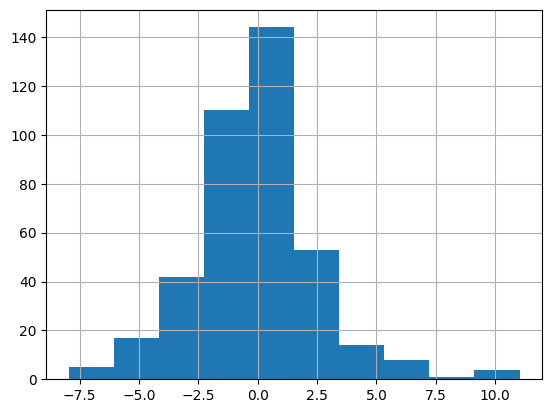

In [111]:
df["mpg_inter_residuals"].hist()
print("std. dev. of residuals = ", df["mpg_inter_residuals"].std())

In [112]:
# Get the significant terms by checking the p values (I really did not want to do this by hand)
terms = model4.params.keys()
sig_terms = []
for i in range(len(terms)):
    if model4.pvalues[i] < 0.05:
        sig_terms.append(terms[i])

print(sig_terms)

['Intercept', 'horsepower_normalized', 'weight_normalized', 'model_year_normalized', 'origin_normalized', 'displacement_normalized:weight_normalized', 'displacement_normalized:model_year_normalized', 'acceleration_normalized:model_year_normalized', 'acceleration_normalized:origin_normalized', 'model_year_normalized:origin_normalized']


8) Remove all of the terms (both linear and interaction) that are not statistically
significant (P&lt;0.05) and refit everything. What is the final residual standard deviation
that you get?

In [113]:
# Refit!
model_string4 = 'mpg ~ '
model_string4 += ' + '.join(sig_terms[1:])
print(model_string4)

model5 = smf.ols(model_string4, data=df)
model5 = model5.fit()
f_pred = model5.predict()

print(model5.summary())

df['mpg_final_predicted'] = f_pred
df['mpg_final_residuals'] = df['mpg'] - f_pred

mpg ~ horsepower_normalized + weight_normalized + model_year_normalized + origin_normalized + displacement_normalized:weight_normalized + displacement_normalized:model_year_normalized + acceleration_normalized:model_year_normalized + acceleration_normalized:origin_normalized + model_year_normalized:origin_normalized
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     305.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.75e-170
Time:                        13:38:53   Log-Likelihood:                -966.45
No. Observations:                 398   AIC:                             1953.
Df Residuals:                     388   BIC:                             1993.
Df Model:                           9             

std. dev. of residuals =  2.747241232236938


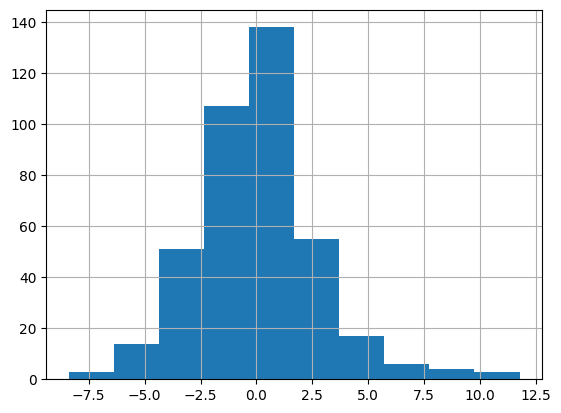

In [114]:
df['mpg_final_residuals'].hist()
print("std. dev. of residuals = ", df["mpg_final_residuals"].std())

If we're using standard deviation of residuals as a metric, the model that threw all the interaction terms together would be the best.